# **The Sparks Foundation**



**Name** : Raman Gupta

**Batch** : GRIP - September'2023

**Task**  :  Exploratory Data Analysis - Terrorism.

# **GLOBAL TERRORISM DATA ANALYSIS**

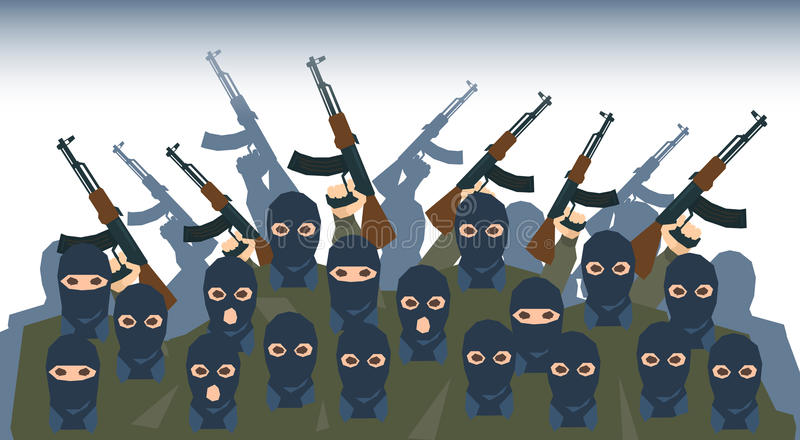

As a **Security/Defense Analyst**, the objective behind this project are as follows :
 * To perform Exploratory Data Analysis, that includes the following :
    
    *  Investigation of data.
    *  To find missing values.
    *  Summary Statistics.
    *  To detect anomalies or outliers.
    *  Discovering patterns.
    *  Graphical representation of data.

 * To find out the hot zone of terrorism.
 * To find out security issues and insights out of EDA.

The Global Terrorism Dataset is a large amount of data that consists 135 columns and 181691 rows.

## **Importing libraries :**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

In [2]:
data=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='latin-1')

C:\Users\raman\AppData\Local\Temp\ipykernel_24404\3248023477.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='latin-1')


## **Basic Investigation :**

In [3]:
data.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data.shape

(181691, 135)

In [5]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [7]:
pd.set_option('display.max_rows', 1000); 
data.nunique()

eventid               181691
iyear                     47
imonth                    13
iday                      32
approxdate              2244
extended                   2
resolution              1859
country                  205
country_txt              205
region                    12
region_txt                12
provstate               2855
city                   36674
latitude               48322
longitude              48039
specificity                5
vicinity                   3
location               44109
summary               112492
crit1                      2
crit2                      2
crit3                      2
doubtterr                  3
alternative                5
alternative_txt            5
multiple                   2
success                    2
suicide                    2
attacktype1                9
attacktype1_txt            9
attacktype2                9
attacktype2_txt            9
attacktype3                8
attacktype3_txt            8
targtype1     

In [8]:
data.isnull().any()

eventid               False
iyear                 False
imonth                False
iday                  False
approxdate             True
extended              False
resolution             True
country               False
country_txt           False
region                False
region_txt            False
provstate              True
city                   True
latitude               True
longitude              True
specificity            True
vicinity              False
location               True
summary                True
crit1                 False
crit2                 False
crit3                 False
doubtterr              True
alternative            True
alternative_txt        True
multiple               True
success               False
suicide               False
attacktype1           False
attacktype1_txt       False
attacktype2            True
attacktype2_txt        True
attacktype3            True
attacktype3_txt        True
targtype1             False
targtype1_txt       

In [9]:
pd.set_option('display.max_rows', 1000); 
data.isnull().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           175377
attacktype2_txt       175377
attacktype3           181263
attacktype3_txt       181263
targtype1     

*There are 135 columns and extracting those columns which provide meaningful insights and renaming them here.*

In [10]:
data.rename(columns = {'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State','region_txt':'Region','attacktype1_txt':'Attack_type','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [11]:
New_data = data[['Year','Month','Day','Country','State','Region','city','latitude','longitude','Attack_type','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

## **Handling missing data :**

In [12]:
New_data.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [13]:
New_data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
State             421
Region              0
city              434
latitude         4556
longitude        4557
Attack_type         0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [14]:
New_data['State'].fillna(0,inplace=True)
New_data['city'].fillna(0,inplace=True)
New_data['latitude'].fillna(0,inplace=True)
New_data['longitude'].fillna(0,inplace=True)
New_data['Killed'].fillna(0,inplace=True)
New_data['Wounded'].fillna(0,inplace=True)
New_data['Target'].fillna(0,inplace=True)
New_data['Summary'].fillna(0,inplace=True)
New_data['Motive'].fillna(0,inplace=True) 
New_data['Group'].fillna(0,inplace=True)
New_data['Weapon_type'].fillna(0,inplace=True)                          

C:\Users\raman\AppData\Local\Temp\ipykernel_24404\2889206702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_data['State'].fillna(0,inplace=True)
C:\Users\raman\AppData\Local\Temp\ipykernel_24404\2889206702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_data['city'].fillna(0,inplace=True)
C:\Users\raman\AppData\Local\Temp\ipykernel_24404\2889206702.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_data['latitude'

In [15]:
New_data.isnull().sum()

Year           0
Month          0
Day            0
Country        0
State          0
Region         0
city           0
latitude       0
longitude      0
Attack_type    0
Killed         0
Wounded        0
Target         0
Summary        0
Group          0
Target_type    0
Weapon_type    0
Motive         0
dtype: int64

### *Great! No more nulls nor missing values present in the data.*

## **Summary Statistics**

* The total number of innocents who were killed from 1970 to 2017 terrorist attacks are :

In [16]:
New_data['Killed'].sum()

411868.0

* To understand the numerical data behind total innocents who were killed and wounded during the attacks.

In [17]:
New_data[["Killed","Wounded"]].describe()

,Killed,Wounded
count,181691.000000,181691.000000
mean,2.266860,2.883296
std,11.227057,34.309747
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.000000,2.000000
max,1570.000000,8191.000000


* To get an overview of region wise casualities.

In [18]:
New_data["Region"].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

## **Correlation Analysis :**

In [19]:
Corr_data = data[['Year','Month','Day','Country','State','Region','city','latitude','longitude','Attack_type','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

<AxesSubplot:>

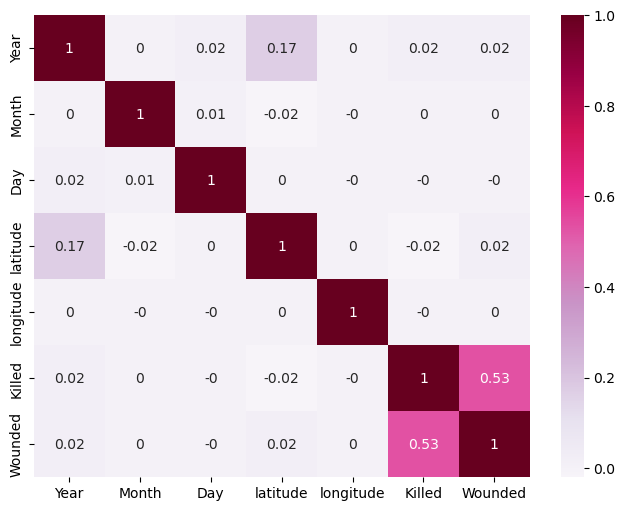

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(np.round(Corr_data.corr(),2),annot=True,cmap='PuRd')

## **Country Wise Terrorist Attacks**

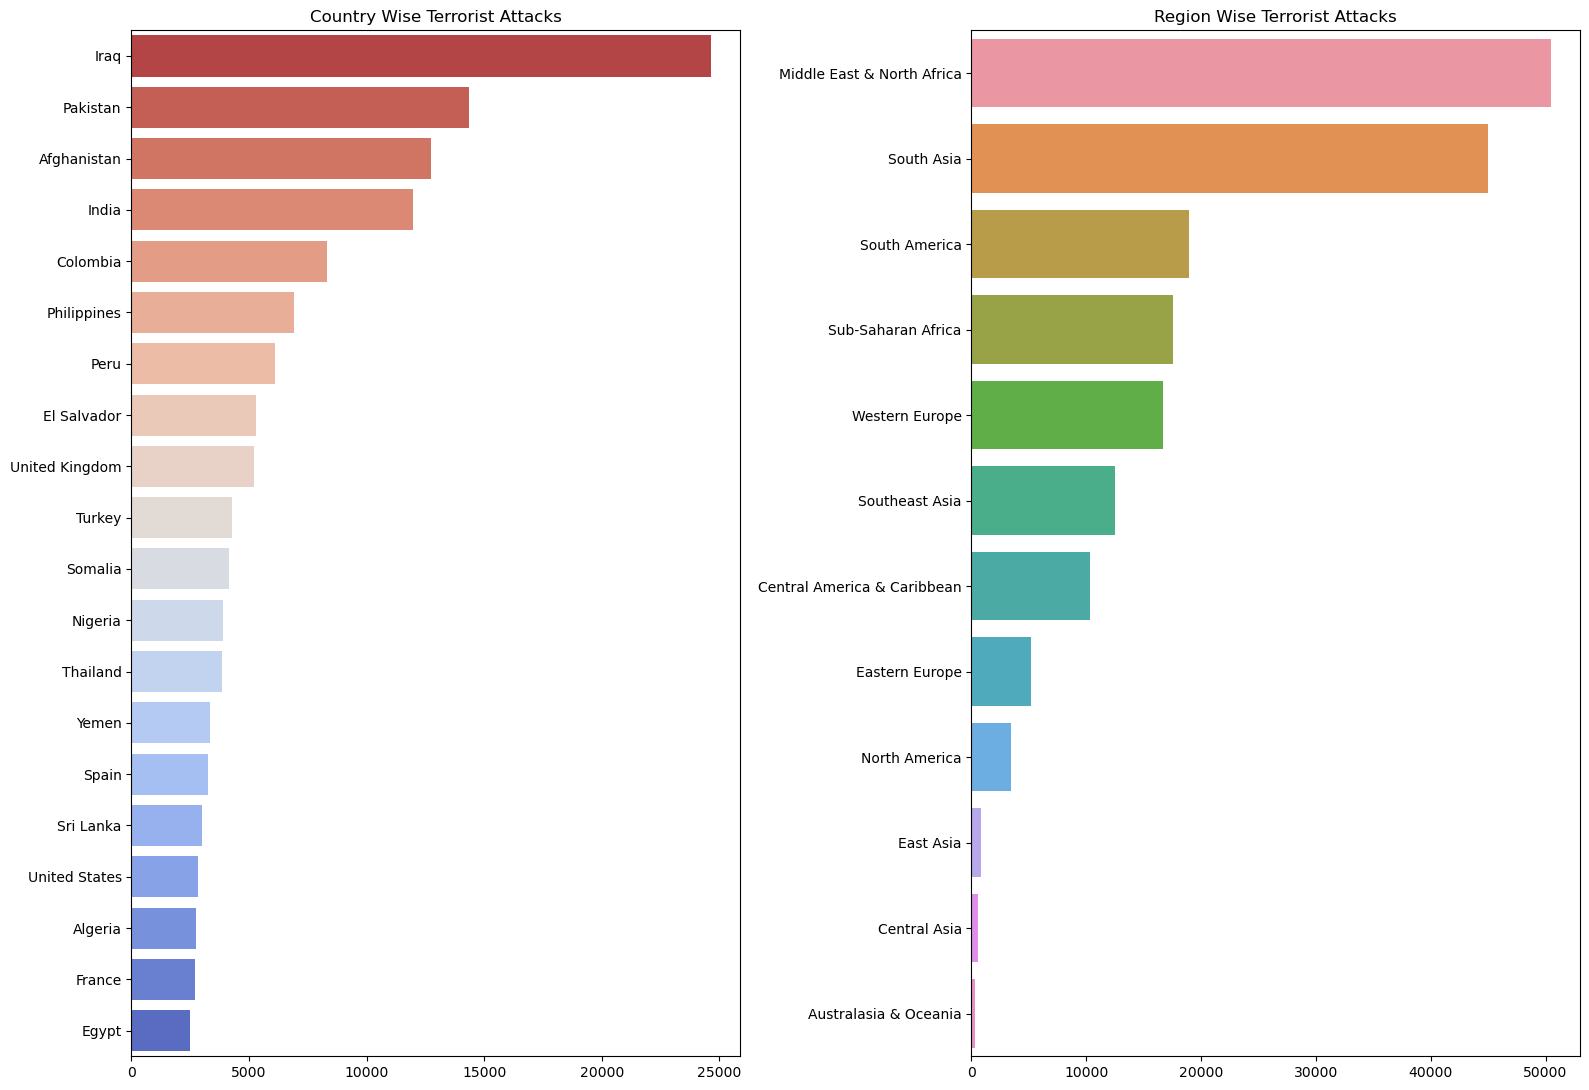

In [21]:
fig,axes = plt.subplots(figsize=(16,11),nrows=1,ncols=2)
sns.barplot(x = data['Country'].value_counts()[:20].values, y = data['Country'].value_counts()[:20].index, 
            ax=axes[0],palette = 'coolwarm_r');
axes[0].set_title('Country Wise Terrorist Attacks')
sns.barplot(x=data['Region'].value_counts().values,y=data['Region'].value_counts().index,
            ax=axes[1])
axes[1].set_title('Region Wise Terrorist Attacks')
fig.tight_layout()
plt.show()

## **Year Wise Terrorist Activities**

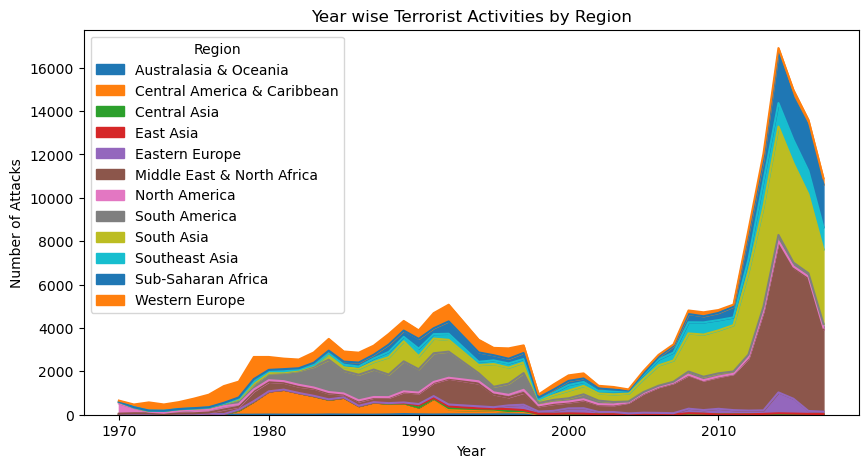

In [22]:
pd.crosstab(data.Year, data.Region).plot(kind='area',figsize=(10,5))
plt.title('Year wise Terrorist Activities by Region')
plt.ylabel('Number of Attacks')
plt.show()

Text(0.5, 1.0, 'Year Wise Terrorist Activities')

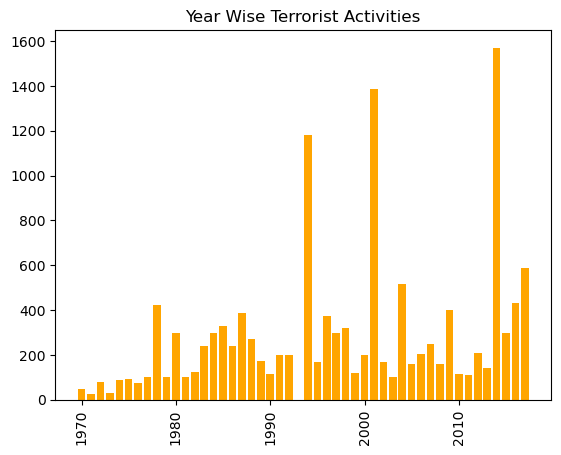

In [23]:
plt.bar(x='Year',height='Killed',data=New_data,color='orange')
plt.xticks(rotation=90)
plt.title('Year Wise Terrorist Activities')

In [24]:
Year=New_data.Year.value_counts().to_dict()
rate=((Year[2017]-Year[1970])/Year[2017])*100
print('A total of', Year[1970],'attacks occured in 1970 and a total of',Year[2017],'attacks occured in the year 2017.')
print('The total number of attacks from 1970 to 2017 has increased by',np.round(rate,0),'percent.')

A total of 651 attacks occured in 1970 and a total of 10900 attacks occured in the year 2017.
The total number of attacks from 1970 to 2017 has increased by 94.0 percent.


## **Attack methods used by Terrorists**

<Figure size 1000x500 with 0 Axes>

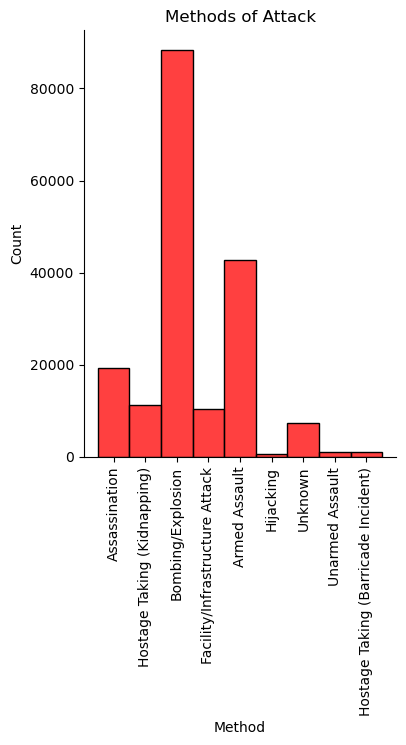

<Figure size 1000x500 with 0 Axes>

In [27]:
sns.displot(New_data['Attack_type'],color='red')
plt.xticks(rotation=90)
plt.xlabel('Method')
plt.title('Methods of Attack')
plt.figure(figsize=(10,5))

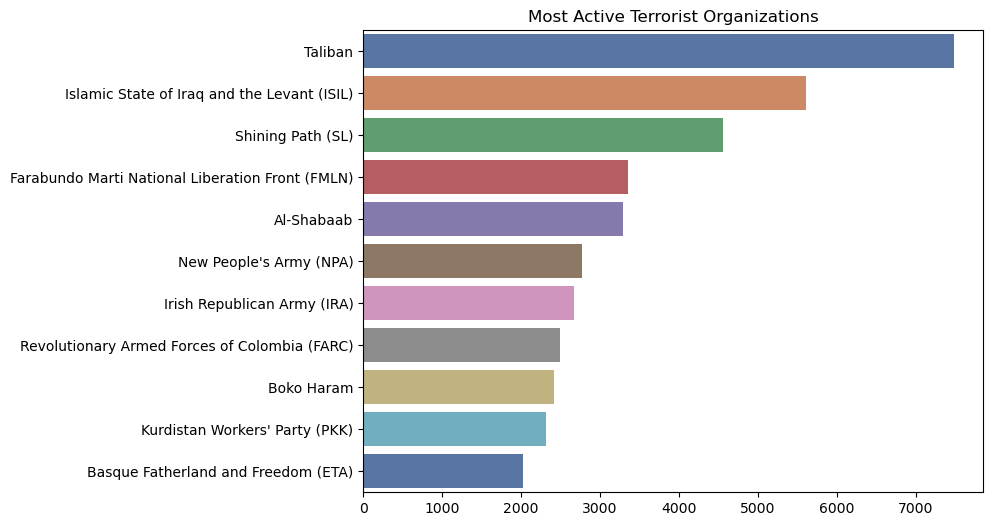

In [28]:
plt.subplots(figsize=(8,6))
sns.barplot(y=data['Group'].value_counts()[1:12].index,x=data['Group'].value_counts()[1:12].values,palette='deep')
plt.title('Most Active Terrorist Organizations')
plt.show()

# **Insights found:**
* Number of attacks have increased from 1970 to 2017 by **94.0%**
* Country **Iraq** is found to be highly targetted and has the most attacks and hence is considered as the **hot zone of terrorism**.
* **The Middle East and North Africa** regions are again the most taregeted ones.
* **Bombing/Explosion** is the most frequent method of attack by terrorists.
* **Taliban and ISIL** are ont the top of the list of most active terrorist organisations.
